# Setting up our envionment

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 37.72 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 827.8MB 14kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17453 sha256=89d922845aea2a5640e6a257016e23f318ad1d6a680586f1944281e8450e89bd
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [ ]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     - 296kB 12.0MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=9e91ffb5d74ee7ac3bd7cd6ecdda43cc5639f839970ad7a33e96e67d3ceaac2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-l_cln5ws/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=9beefc311819fff4e8d82ea52c03e52715b31e8345d9f4098218c0e5d40f5cba
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |██████████████████

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

##THIS CELL NEEDS CHANGED##

!curl -L "https://app.roboflow.com/ds/GbodGWeu1j?key=BzZLB6tLMs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1019      0 --:--:-- --:--:-- --:--:--  1018
100 19.8M  100 19.8M    0     0  14.2M      0  0:00:01  0:00:01 --:--:-- 14.2M
Archive:  roboflow.zip
 extracting: test/IMG_20200918_124047_jpg.rf.266c7be092c48fc26d676c5fe9410333.jpg  
 extracting: test/IMG_20200918_124008_jpg.rf.16e651783c809d4161de73c92cc9fbe3.jpg  
 extracting: test/IMG_20200918_124325_jpg.rf.784a2ce6f8d007d2401e687dafbc92f4.jpg  
 extracting: train/IMG_20200918_125605_jpg.rf.00643275123d6e976bcc89f6e6078a83.jpg  
 extracting: test/IMG_20200918_124707_jpg.rf.8596a08198bb3c639bbbba670cceb50d.jpg  
 extracting: test/IMG_20200918_125207_jpg.rf.a13bfeea270544c73786ebf0abdb597c.jpg  
 extracting: train/IMG_20200918_125332_jpg.rf.0327c65ef9b5aa40ba3e54e282218230.jpg  
 extracting: train/IMG_20200918_125618_jpg.rf.095ba3150a79da929edd78244

In [ ]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  sample_data/  train/
README.roboflow.txt     test/         valid/


In [ ]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

_annotations.coco.json
IMG_20200918_123718_jpg.rf.3610f5c1171eddf8f5f2f9472a6f533e.jpg
IMG_20200918_123718_jpg.rf.a75ec1255e7be946645fba7fe959c427.jpg
IMG_20200918_123718_jpg.rf.b7f60e1e4dafbe3411aa6e4970d23ea8.jpg
IMG_20200918_123733_jpg.rf.4e0c11829e588319e9313171f394916e.jpg
IMG_20200918_123733_jpg.rf.580185ead4ecbba639afbc913f8c498d.jpg
IMG_20200918_123733_jpg.rf.6ab43aaf98c23be22731d5e54e781fa3.jpg
IMG_20200918_123740_jpg.rf.be872094d7c96a82193bc1e37c1eba23.jpg
IMG_20200918_123740_jpg.rf.c366cf4a2b2f15e373e25e449e446bf9.jpg
IMG_20200918_123740_jpg.rf.cea890626396b9cb54212c4edd4dc042.jpg
IMG_20200918_123757_jpg.rf.22ac78aa68f15280b80311ec05fca23e.jpg
IMG_20200918_123757_jpg.rf.6ea6a4aabe4b3dcb13076772bd673f89.jpg
IMG_20200918_123757_jpg.rf.8f6e01ded947a4aee7416d2e87dfda26.jpg
IMG_20200918_123806_jpg.rf.2e662958add3db983d83592ed6b2607f.jpg
IMG_20200918_123806_jpg.rf.3f20dc6d753be8beffe6b4b251a06a43.jpg
IMG_20200918_123806_jpg.rf.a3442b654c3ec441f67d10c561eea91c.jpg
IMG_20200918_1238

In [ ]:
#let's take a peek at the annotations
#class categories, and bounding boxes are provided for our train set
#%pycat train/_annotations.coco.json

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir stationery
!mkdir stationery/annotations
!mkdir stationery/Annotations
!mkdir stationery/Images

In [ ]:
%cp train/_annotations.coco.json stationery/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg stationery/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "stationery";
img_dir = "./";
set_dir = "Images";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this fu


CPU times: user 29min 50s, sys: 6min 39s, total: 36min 29s
Wall time: 39min 33s


# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['Scissors-Pencils-Notebook', 'Notebook', 'Pens & Pencils', 'Scissors']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.046s)
CPU times: user 68.8 ms, sys: 12.3 ms, total: 81.1 ms
Wall time: 103 ms


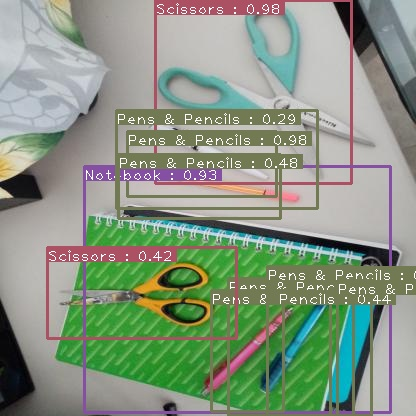

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

# Export Trained Weights

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=262359b90c4000167bf2781cd2465adb872a1935d1f66b93b9868aa237eac13e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6brh4gde/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [ ]:
#recover trained weights
!mkdir '/trained'
#note these are old weights that I didn't train for too long.  15:18
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-22:43.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-22:43.pth' '/trained/signatrix_efficientdet_coco.pth'

mkdir: cannot create directory ‘/trained’: File exists
cp: cannot stat '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-15:18.onnx': No such file or directory
cp: cannot stat '/content/drive/My Drive/signatrix_efficientdet_coco_2020-04-10-15:18.pth': No such file or directory


In [ ]:
!ls trained

signatrix_efficientdet_coco.onnx  signatrix_efficientdet_coco.pth


In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained")

In [ ]:
#download some test data
#!curl -L [YOUR LINK HERE] | jar -x

In [ ]:
!ls test

_annotations.coco.json
IMG_20200918_123703_jpg.rf.50a00292da854114c0225374873c7cd7.jpg
IMG_20200918_124008_jpg.rf.16e651783c809d4161de73c92cc9fbe3.jpg
IMG_20200918_124047_jpg.rf.266c7be092c48fc26d676c5fe9410333.jpg
IMG_20200918_124058_jpg.rf.254b957c8cd2cf3a0f87035fc1a0e971.jpg
IMG_20200918_124325_jpg.rf.784a2ce6f8d007d2401e687dafbc92f4.jpg
IMG_20200918_124332_jpg.rf.213d42e54b9167ae1cb30c588150e740.jpg
IMG_20200918_124346_jpg.rf.2273d2e4120364bf1419831eb5c2d07d.jpg
IMG_20200918_124612_jpg.rf.e9a32afa0b331697b04053caca6652cd.jpg
IMG_20200918_124707_jpg.rf.8596a08198bb3c639bbbba670cceb50d.jpg
IMG_20200918_125150_jpg.rf.bbeb72fe79074b96788bd51221be759d.jpg
IMG_20200918_125202_jpg.rf.89c1471af952f72ce6d016efb6b7ad12.jpg
IMG_20200918_125207_jpg.rf.a13bfeea270544c73786ebf0abdb597c.jpg
IMG_20200918_125228_jpg.rf.0be1c15998c02b9833c910fec59c5b73.jpg
IMG_20200918_125342_jpg.rf.08d0ab92cc80f2a97851bd7b93295bc4.jpg
IMG_20200918_125530_jpg.rf.bfa1d654e4e3613d75f1766a87fbad97.jpg


In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['Scissors-Pencils-Notebook', 'Notebook', 'Pens & Pencils', 'Scissors']

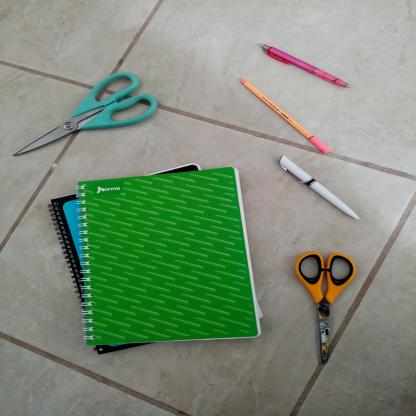

Done. (0.052s)


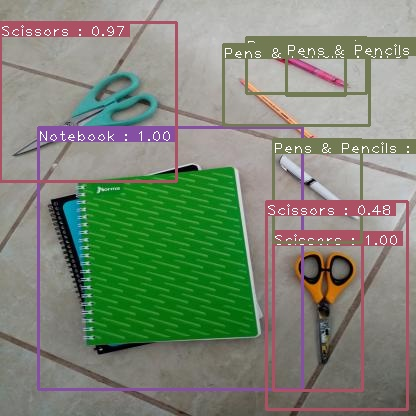

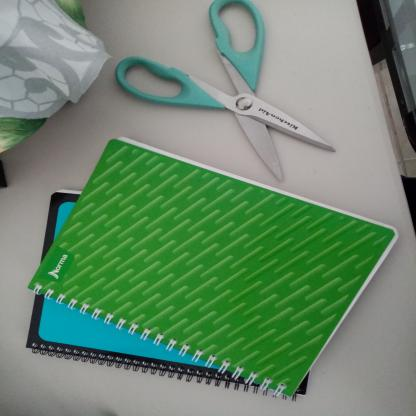

Done. (0.048s)


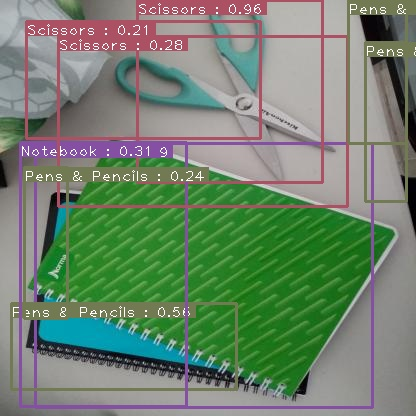

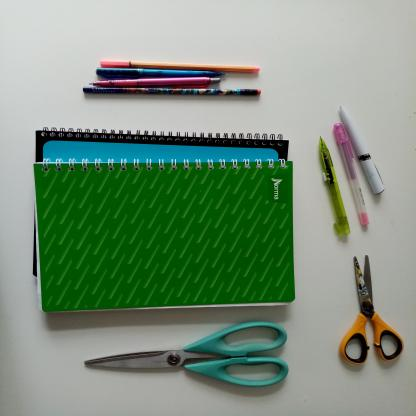

Done. (0.059s)


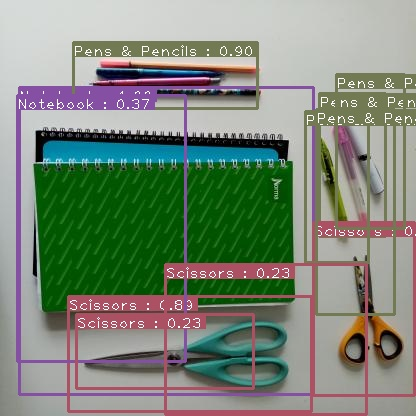

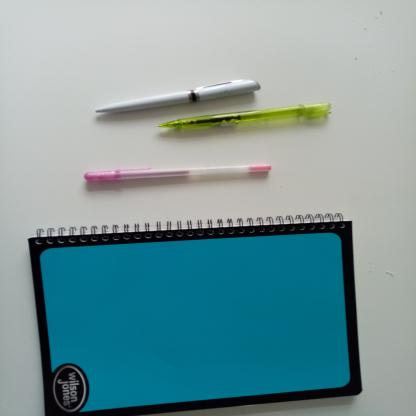

Done. (0.040s)


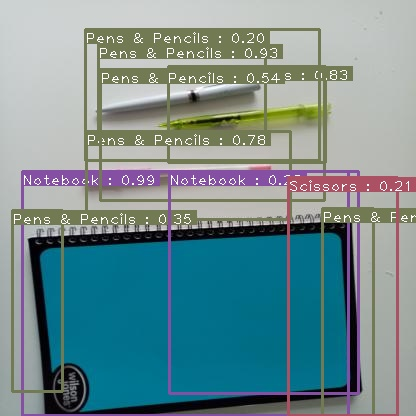

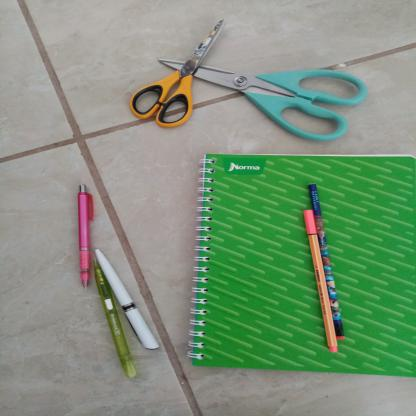

Done. (0.050s)


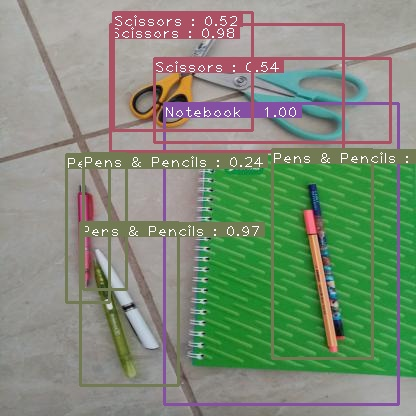

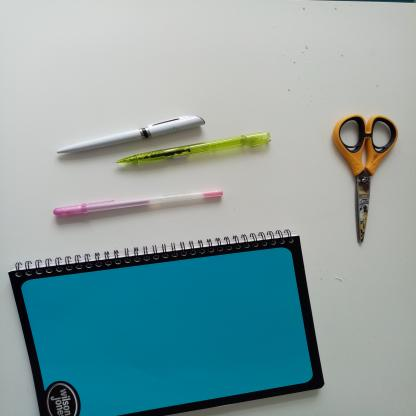

Done. (0.042s)


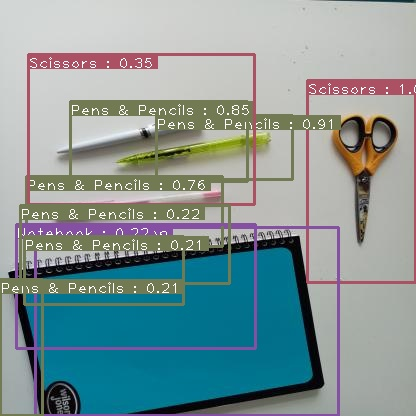

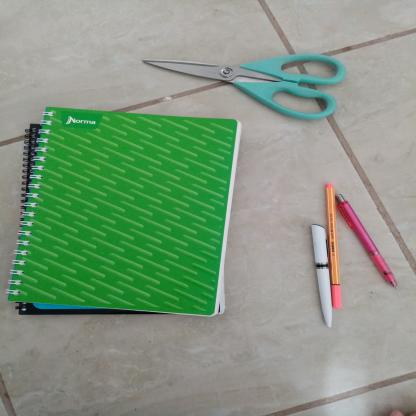

Done. (0.043s)


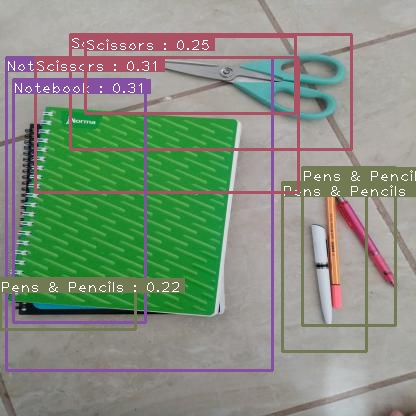

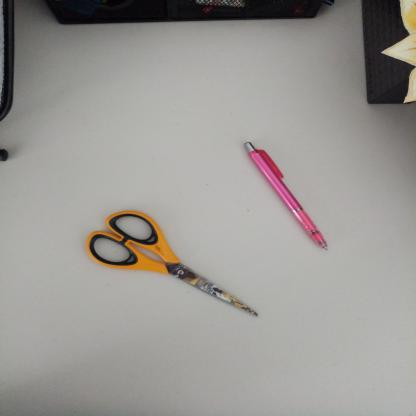

Done. (0.041s)


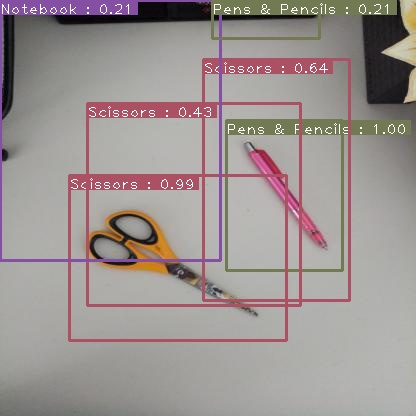

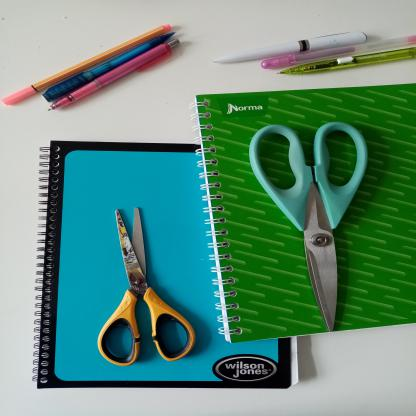

Done. (0.049s)


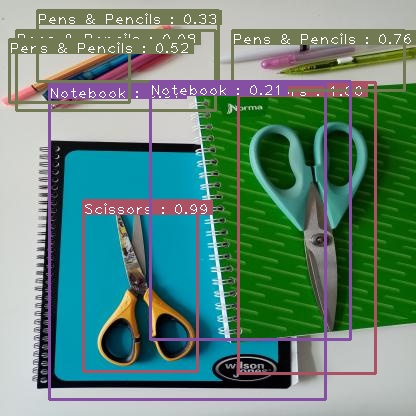

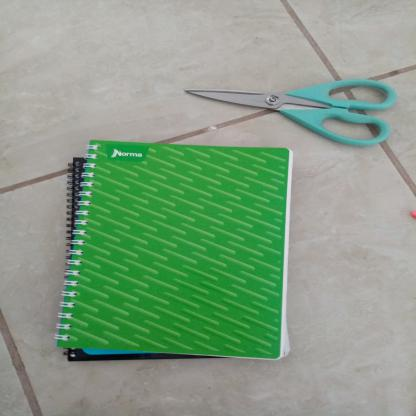

Done. (0.042s)


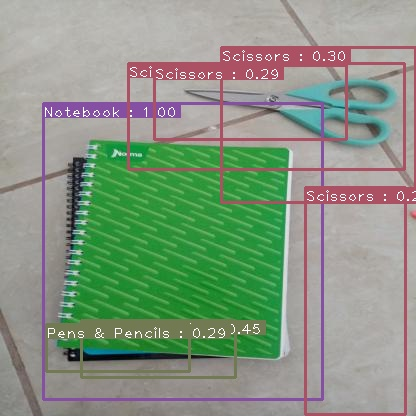

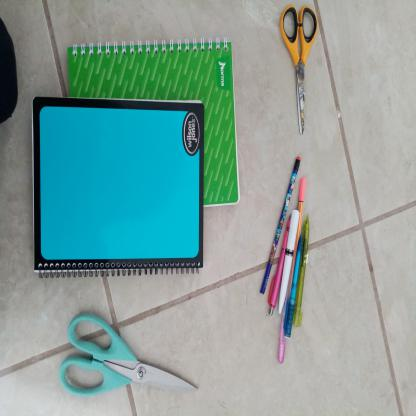

Done. (0.057s)


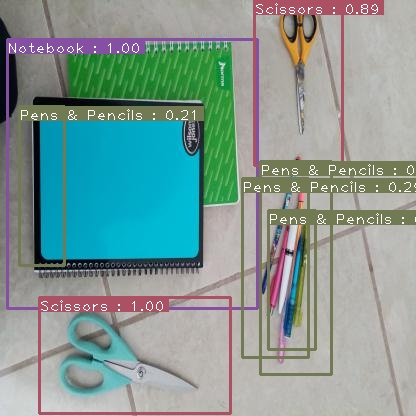

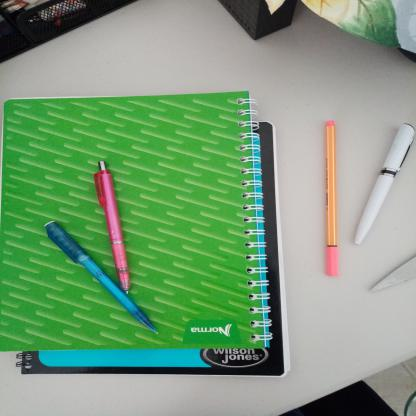

Done. (0.045s)


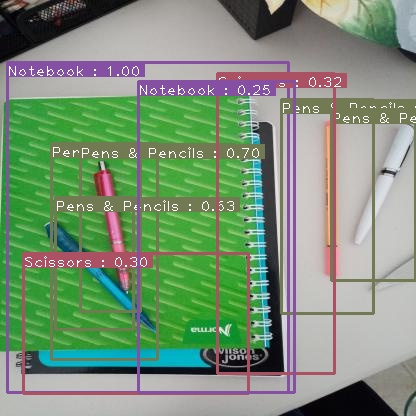

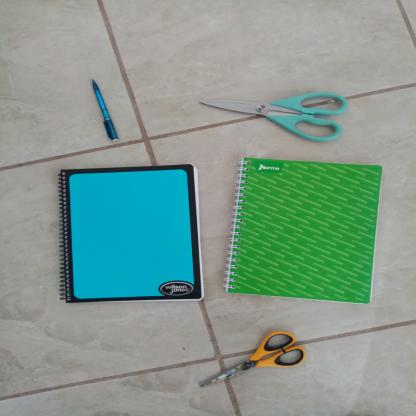

Done. (0.039s)


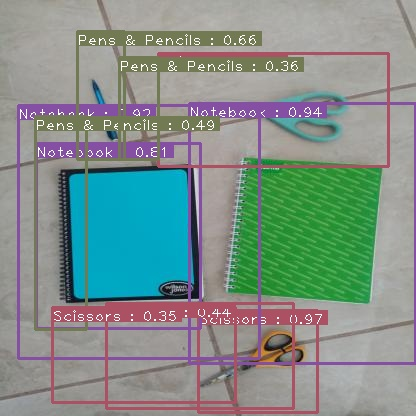

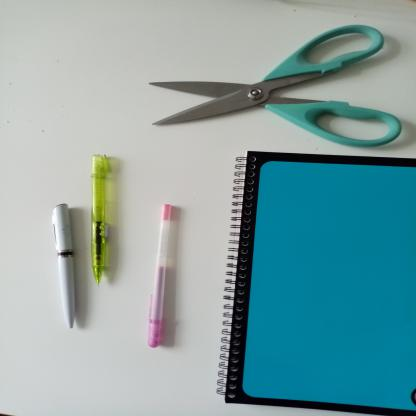

Done. (0.037s)


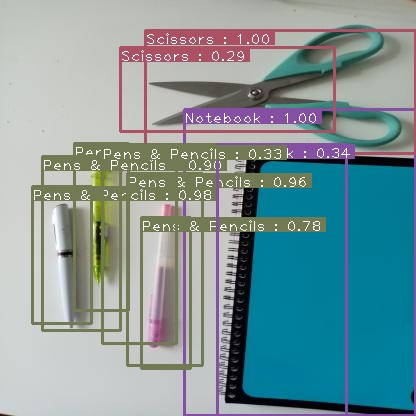

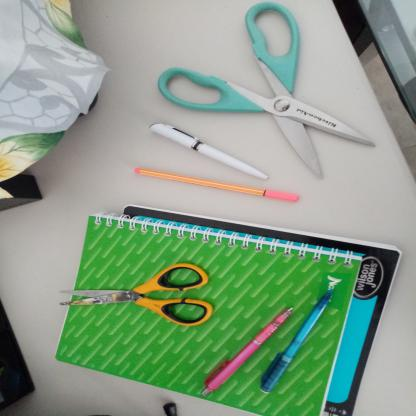

Done. (0.033s)


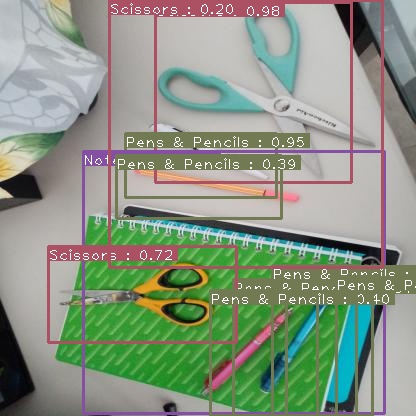

In [ ]:
import os
import fnmatch
from IPython.display import Image

path_dir = "test/"

for img_path in os.listdir("test/"):
  if fnmatch.fnmatch(img_path, "*.jpg"):
    im1 = Image(filename=path_dir+img_path)
    display(im1)
    duration, scores, labels, boxes = gtf.Predict(path_dir+img_path, class_list, vis_threshold=0.2);
    im2 = Image(filename='output.jpg')
    display(im2)
    
    Image(filename='output.jpg')